In [120]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
import IPython.display as ipd
import numpy as np
import cairo
import cv2
import math

CAN LABEL

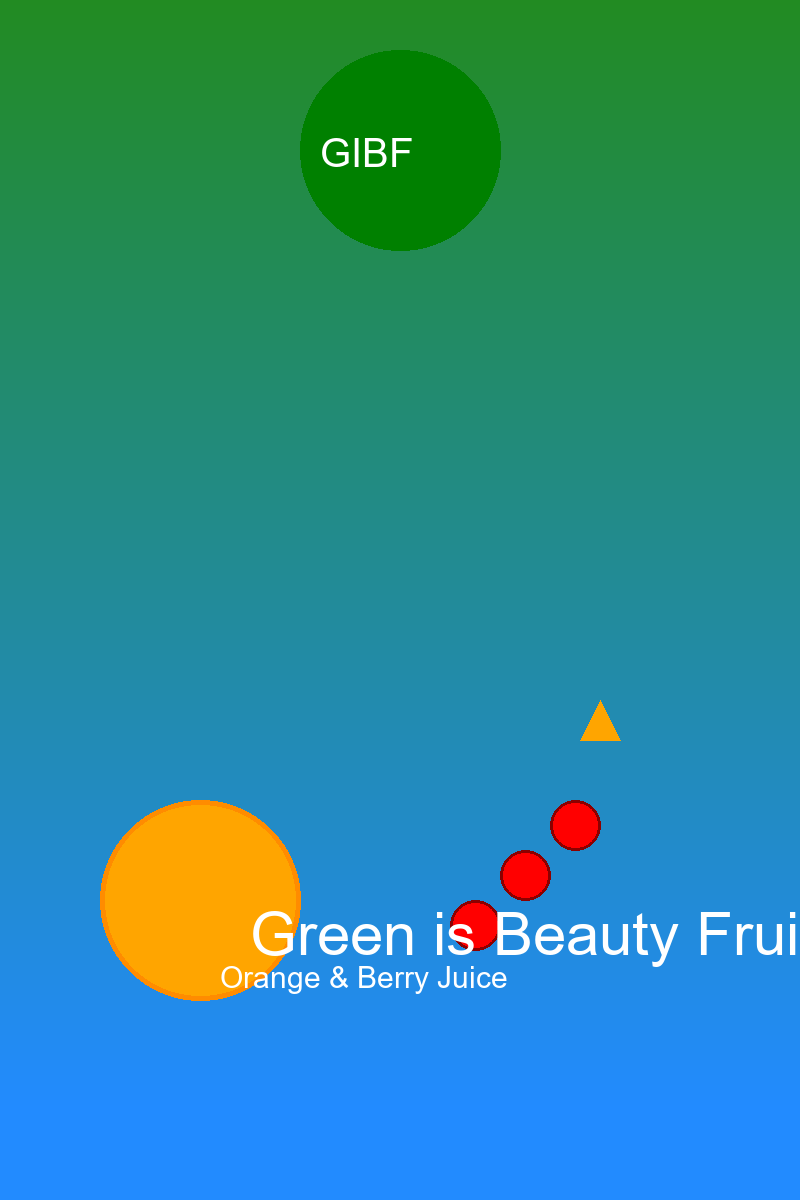

In [8]:
# Constants
CAN_WIDTH, CAN_HEIGHT = 800, 1200
LOGO_RADIUS = 100
FONT_PATH = "arial.ttf"  # Ensure the font exists on your system or use a valid path

# Create base can label
def create_can_label():
    # Create a blank canvas
    image = Image.new("RGB", (CAN_WIDTH, CAN_HEIGHT), color="white")
    draw = ImageDraw.Draw(image)
    
    # Draw background gradient
    for i in range(CAN_HEIGHT):
        color = (34, 139, 34 + i // 5)  # Gradient from green to light green
        draw.line([(0, i), (CAN_WIDTH, i)], fill=color)
    
    # Draw the logo
    draw_logo(draw, CAN_WIDTH // 2, LOGO_RADIUS + 50)
    
    # Add fruits (simplified graphics)
    draw_fruits(draw)
    
    # Add branding text
    font_large = ImageFont.truetype(FONT_PATH, 60)
    font_small = ImageFont.truetype(FONT_PATH, 30)
    draw.text((CAN_WIDTH // 2 - 150, CAN_HEIGHT - 300), "Green is Beauty Fruits", fill="white", font=font_large)
    draw.text((CAN_WIDTH // 2 - 180, CAN_HEIGHT - 240), "Orange & Berry Juice", fill="white", font=font_small)
    
    return image

# Draw the logo
def draw_logo(draw, x, y):
    # Draw a circular logo background
    draw.ellipse((x - LOGO_RADIUS, y - LOGO_RADIUS, x + LOGO_RADIUS, y + LOGO_RADIUS), fill="green")
    
    # Add text to logo
    font = ImageFont.truetype(FONT_PATH, 40)
    draw.text((x - 80, y - 20), "GIBF", fill="white", font=font)

# Add fruits to the design
def draw_fruits(draw):
    # Add an orange
    draw.ellipse((100, 800, 300, 1000), fill="orange", outline="darkorange", width=5)
    
    # Add berries
    draw.ellipse((500, 850, 550, 900), fill="red", outline="darkred", width=3)
    draw.ellipse((550, 800, 600, 850), fill="red", outline="darkred", width=3)
    draw.ellipse((450, 900, 500, 950), fill="red", outline="darkred", width=3)
    
    # Add juice droplets
    draw.polygon([(600, 700), (620, 740), (580, 740)], fill="orange")

# Save and display the label
def save_can_label(image):
    image.save("juice_can_label.png")
    image.show()

# Main Function
if __name__ == "__main__":
    label_image = create_can_label()
    save_can_label(label_image)

ipd.Image("juice_can_label.png")


CAN LABEL CAIRO OPTION

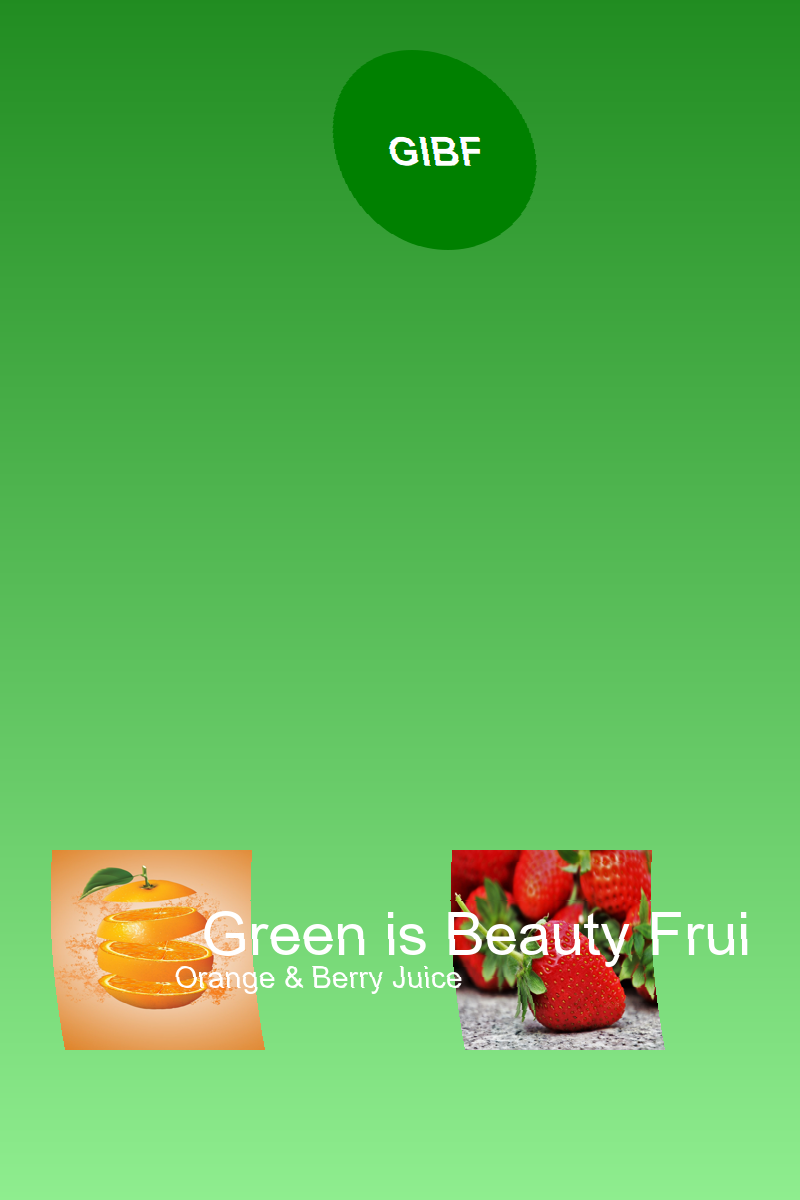

In [16]:
# Constants
CAN_WIDTH, CAN_HEIGHT = 800, 1200  # Dimensions of the can label
LOGO_RADIUS = 100
FONT_PATH = "arial.ttf"
FRUIT_IMAGES = {
    "orange": r"cansProj/orange-7713308_1280.jpg",  
    "berries": r" cansProj/strawberries-3359755_1280.jpg"  
}

# Create a gradient background using Cairo
def create_gradient_background():
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, CAN_WIDTH, CAN_HEIGHT)
    ctx = cairo.Context(surface)
    
    # Create a vertical gradient from dark green to light green
    gradient = cairo.LinearGradient(0, 0, 0, CAN_HEIGHT)
    gradient.add_color_stop_rgba(0, 0.13, 0.55, 0.13, 1)  # Dark green
    gradient.add_color_stop_rgba(1, 0.56, 0.93, 0.56, 1)  # Light green
    ctx.set_source(gradient)
    ctx.rectangle(0, 0, CAN_WIDTH, CAN_HEIGHT)
    ctx.fill()
    
    surface.write_to_png("gradient_background.png")
    return surface

# Draw a circular logo with text
def draw_logo(ctx, x, y):
    # Draw the circular background
    ctx.arc(x, y, LOGO_RADIUS, 0, 2 * math.pi)
    ctx.set_source_rgb(0.0, 0.5, 0.0)  # Green color
    ctx.fill()
    
    # Add text to the logo
    ctx.select_font_face("Arial", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_BOLD)
    ctx.set_font_size(40)
    ctx.set_source_rgb(1, 1, 1)  # White text
    text = "GIBF"
    text_extents = ctx.text_extents(text)
    text_x = x - text_extents.width / 2
    text_y = y + text_extents.height / 2
    ctx.move_to(text_x, text_y)
    ctx.show_text(text)

# Add fruit images to the design
def add_fruits_to_label(base_image):
    for fruit, path in FRUIT_IMAGES.items():
        try:
            fruit_img = Image.open(path).convert("RGBA")
            fruit_img = fruit_img.resize((200, 200))  # Resize to fit
            if fruit == "orange":
                base_image.paste(fruit_img, (100, 850), fruit_img)  # Bottom-left
            elif fruit == "berries":
                base_image.paste(fruit_img, (500, 850), fruit_img)  # Bottom-right
        except FileNotFoundError:
            print(f"Warning: {fruit} image not found at {path}")

# Add branding text to the label
def add_branding_text(base_image):
    draw = ImageDraw.Draw(base_image)
    font_large = ImageFont.truetype(FONT_PATH, 60)
    font_small = ImageFont.truetype(FONT_PATH, 30)
    draw.text((CAN_WIDTH // 2 - 150, CAN_HEIGHT - 300), "Green is Beauty Fruits", fill="white", font=font_large)
    draw.text((CAN_WIDTH // 2 - 180, CAN_HEIGHT - 240), "Orange & Berry Juice", fill="white", font=font_small)

# Simulate the cylindrical wrapping effect
def simulate_can_3d(base_image):
    # Create a 3D effect by warping the image (simple cylindrical wrap simulation)
    width, height = base_image.size
    new_image = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    for y in range(height):
        for x in range(width):
            offset = int(50 * math.sin(2 * math.pi * y / height))  # Sinusoidal offset
            new_x = (x + offset) % width
            new_image.putpixel((new_x, y), base_image.getpixel((x, y)))
    return new_image

# Main function
def create_juice_can_label():
    # Create background
    create_gradient_background()
    base_image = Image.open("gradient_background.png").convert("RGBA")
    
    # Use Cairo for logo
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, CAN_WIDTH, CAN_HEIGHT)
    ctx = cairo.Context(surface)
    ctx.set_source_surface(cairo.ImageSurface.create_from_png("gradient_background.png"))
    ctx.paint()
    
    # Draw logo at the top-center
    draw_logo(ctx, CAN_WIDTH // 2, LOGO_RADIUS + 50)
    surface.write_to_png("cairo_logo_layer.png")
    logo_layer = Image.open("cairo_logo_layer.png").convert("RGBA")
    base_image = Image.alpha_composite(base_image, logo_layer)
    
    # Add fruits and text
    add_fruits_to_label(base_image)
    add_branding_text(base_image)
    
    # Simulate 3D wrapping
    wrapped_image = simulate_can_3d(base_image)
    
    # Save and display the final design
    wrapped_image.save("juice_can_label_3d.png")
    wrapped_image.show()

# Execute the program
if __name__ == "__main__":
    create_juice_can_label()
ipd.Image("juice_can_label_3d.png")

ENHANCED PROFESSIONAL CAN LABEL

Label saved to juice_can_label_final.png


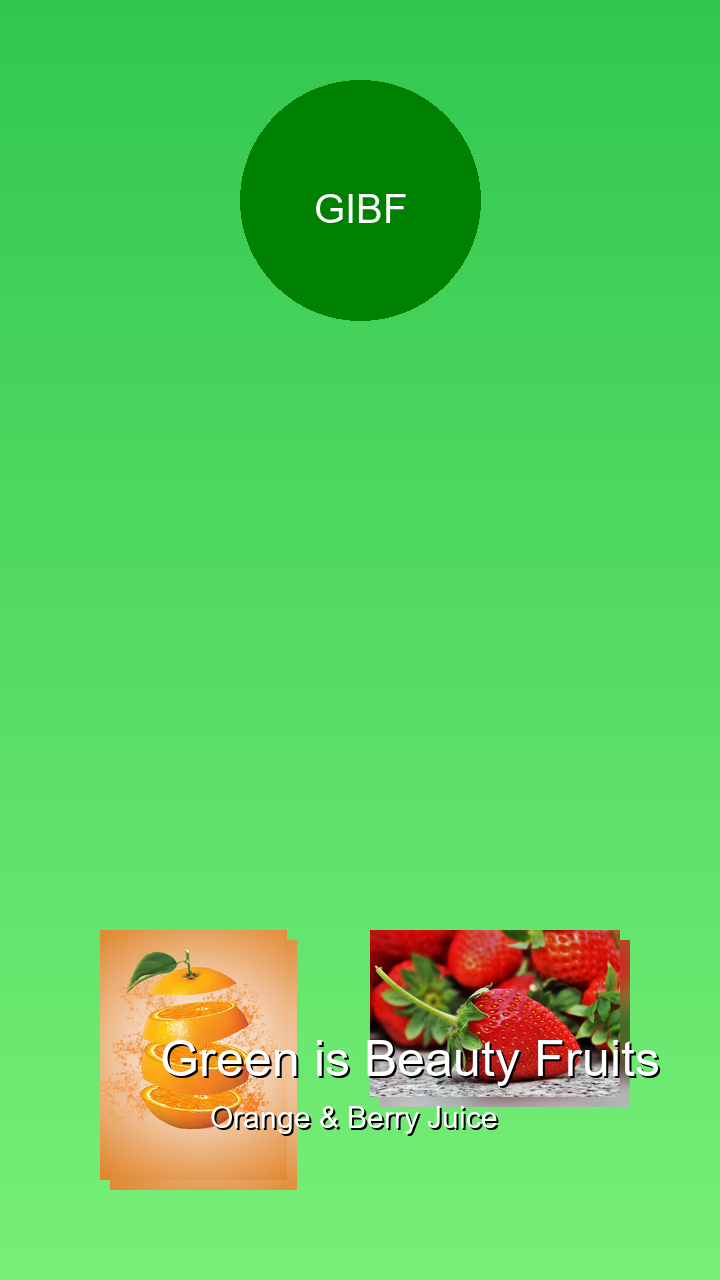

In [52]:
# --- Settings ---
WIDTH, HEIGHT = 720, 1280  # Label size
BACKGROUND_COLOR = (50, 200, 80)  # Gradient green start
BACKGROUND_BOTTOM = (120, 240, 120)  # Gradient green bottom
LOGO_COLOR = (0, 128, 0)  # Dark green for the logo circle

# Paths to resources
orange_image_path = "cansProj/orange-7713308_1280.jpg" 
strawberry_image_path = "cansProj/strawberries-3359755_1280.jpg"  
output_file = "juice_can_label_final.png"

# --- Step 1: Create gradient background ---
def create_gradient_background(width, height, top_color, bottom_color):
    """
    Creates a smooth gradient background transitioning from top_color to bottom_color.
    """
    gradient = Image.new("RGB", (width, height), top_color)
    top = np.array(top_color)
    bottom = np.array(bottom_color)

    for y in range(height):
        ratio = y / height
        blended_color = tuple((top * (1 - ratio) + bottom * ratio).astype(int))
        ImageDraw.Draw(gradient).line([(0, y), (width, y)], fill=blended_color)

    return gradient

# --- Step 2: Add the circular logo ---
def add_logo(draw, text="GIBF", position=(360, 150), radius=120, color=(0, 128, 0)):
    """
    Adds a circular logo with centered text.
    """
    x, y = position
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], fill=color)
    
    # Add logo text
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    draw.text((x - text_width // 2, y - text_height // 2), text, fill="white", font=font)

# --- Step 3: Resize and add fruit images ---
def add_fruit_image(base_image, fruit_path, position, max_size):
    """
    Adds a fruit image to the label with a shadow effect.
    """
    fruit = Image.open(fruit_path).convert("RGBA")
    fruit.thumbnail(max_size, Image.LANCZOS)    
    # Add a soft shadow for a 3D effect
    shadow = fruit.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(fruit, position, fruit)

# --- Step 4: Add product name and tagline ---
def add_text(draw, text, position, font_size, color, shadow_offset=(2, 2)):
    """
    Adds text to the image with a subtle shadow for contrast.
    """
    font = ImageFont.truetype("arial.ttf", font_size)
    x, y = position
    
    # Add drop shadow for contrast
    draw.text((x + shadow_offset[0], y + shadow_offset[1]), text, fill="black", font=font)
    draw.text((x, y), text, fill=color, font=font)

# --- Main function to assemble the label ---
def create_juice_can_label():
    """
    Main function to generate the juice can label with all components.
    """
    # Step 1: Create background gradient
    background = create_gradient_background(WIDTH, HEIGHT, BACKGROUND_COLOR, BACKGROUND_BOTTOM)
    draw = ImageDraw.Draw(background)

    # Step 2: Add the logo at the top
    add_logo(draw, text="GIBF", position=(WIDTH // 2, 200), radius=120, color=LOGO_COLOR)

    # Step 3: Add fruit images
    add_fruit_image(background, orange_image_path, position=(100, HEIGHT - 350), max_size=(250, 250))
    add_fruit_image(background, strawberry_image_path, position=(WIDTH - 350, HEIGHT - 350), max_size=(250, 250))

    # Step 4: Add product name and tagline
    product_name = "Green is Beauty Fruits"
    tagline = "Orange & Berry Juice"

    add_text(draw, product_name, position=(WIDTH // 2 - 200, HEIGHT - 250), font_size=50, color="white")
    add_text(draw, tagline, position=(WIDTH // 2 - 150, HEIGHT - 180), font_size=30, color="white")

    # Save and display the final image
    background.save(output_file)
    print(f"Label saved to {output_file}")
    return background

# Run the main function
if __name__ == "__main__":
    final_image = create_juice_can_label()
ipd.Image(output_file)  


ADD A GLASS SPLASHING JUICE

Label saved to juice_can_label_with_glass.png


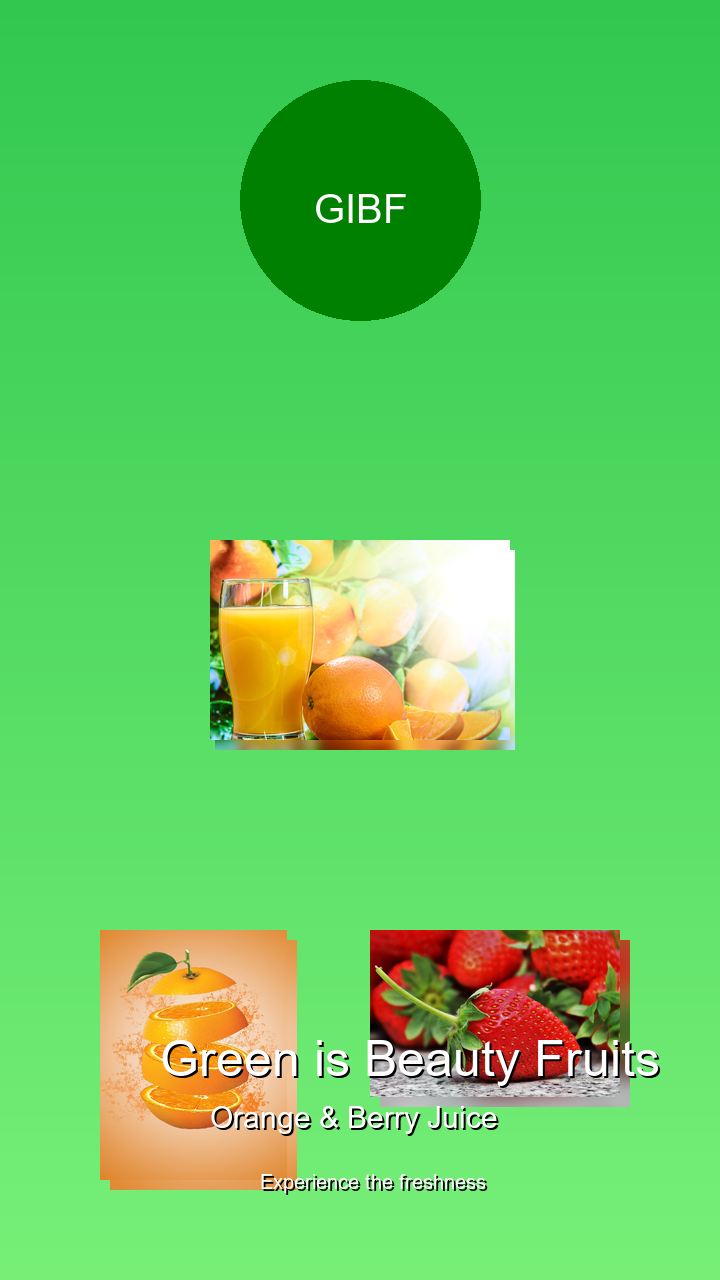

In [69]:
# Settings
WIDTH, HEIGHT = 720, 1280  # Label size
BACKGROUND_COLOR = (50, 200, 80)  # Gradient green start
BACKGROUND_BOTTOM = (120, 240, 120)  # Gradient green bottom
LOGO_COLOR = (0, 128, 0)  # Dark green for the logo circle

# Paths to resources
orange_image_path = "cansProj/orange-7713308_1280.jpg"
strawberry_image_path = "cansProj/strawberries-3359755_1280.jpg"
glass_image_path = "cansProj/orange-1921548_1280.jpg"  
output_file = "juice_can_label_with_glass.png"

# --- Step 1: Create gradient background ---
def create_gradient_background(width, height, top_color, bottom_color):
    gradient = Image.new("RGB", (width, height), top_color)
    top = np.array(top_color)
    bottom = np.array(bottom_color)

    for y in range(height):
        ratio = y / height
        blended_color = tuple((top * (1 - ratio) + bottom * ratio).astype(int))
        ImageDraw.Draw(gradient).line([(0, y), (width, y)], fill=blended_color)

    return gradient

# --- Step 2: Add the circular logo ---
def add_logo(draw, text="GIBF", position=(360, 150), radius=120, color=(0, 128, 0)):
    x, y = position
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], fill=color)
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    draw.text((x - text_width // 2, y - text_height // 2), text, fill="white", font=font)

# --- Step 3: Add fruit images ---
def add_fruit_image(base_image, fruit_path, position, max_size):
    fruit = Image.open(fruit_path).convert("RGBA")
    fruit.thumbnail(max_size, Image.Resampling.LANCZOS)
    shadow = fruit.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(fruit, position, fruit)

# --- Step 4: Add juice glass image ---
def add_glass_image(base_image, glass_path, position, max_size):
    glass = Image.open(glass_path).convert("RGBA")
    glass.thumbnail(max_size, Image.Resampling.LANCZOS)
    shadow = glass.copy().filter(ImageFilter.GaussianBlur(5))
    shadow_position = (position[0] + 5, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(glass, position, glass)

# --- Step 5: Add product name and tagline ---
def add_text(draw, text, position, font_size, color, shadow_offset=(2, 2)):
    font = ImageFont.truetype("arial.ttf", font_size)
    x, y = position
    draw.text((x + shadow_offset[0], y + shadow_offset[1]), text, fill="black", font=font)
    draw.text((x, y), text, fill=color, font=font)

# --- Main function ---
def create_juice_can_label():
    background = create_gradient_background(WIDTH, HEIGHT, BACKGROUND_COLOR, BACKGROUND_BOTTOM)
    draw = ImageDraw.Draw(background)

    # Add logo
    add_logo(draw, text="GIBF", position=(WIDTH // 2, 200), radius=120, color=LOGO_COLOR)

    # Add glass with juice splash (centered)
    add_glass_image(background, glass_image_path, position=(WIDTH // 2 - 150, HEIGHT // 2 - 100), max_size=(300, 300))

    # Add fruit images
    add_fruit_image(background, orange_image_path, position=(100, HEIGHT - 350), max_size=(250, 250))
    add_fruit_image(background, strawberry_image_path, position=(WIDTH - 350, HEIGHT - 350), max_size=(250, 250))

    # Add product name and tagline
    product_name = "Green is Beauty Fruits"
    tagline = "Orange & Berry Juice"
    tagline2 = "Experience the freshness"

    add_text(draw, product_name, position=(WIDTH // 2 - 200, HEIGHT - 250), font_size=50, color="white")
    add_text(draw, tagline, position=(WIDTH // 2 - 150, HEIGHT - 180), font_size=30, color="white")
    add_text(draw, tagline2, position=(WIDTH // 2 - 100, HEIGHT - 110), font_size=20, color="white")


    # Save the output
    background.save(output_file)
    print(f"Label saved to {output_file}")

if __name__ == "__main__":
    create_juice_can_label()
ipd.Image(output_file)


ADJUST SPACE BETWEEN THE GRAPHIC ELEMENTS

Label saved to juice_can_label_final.png


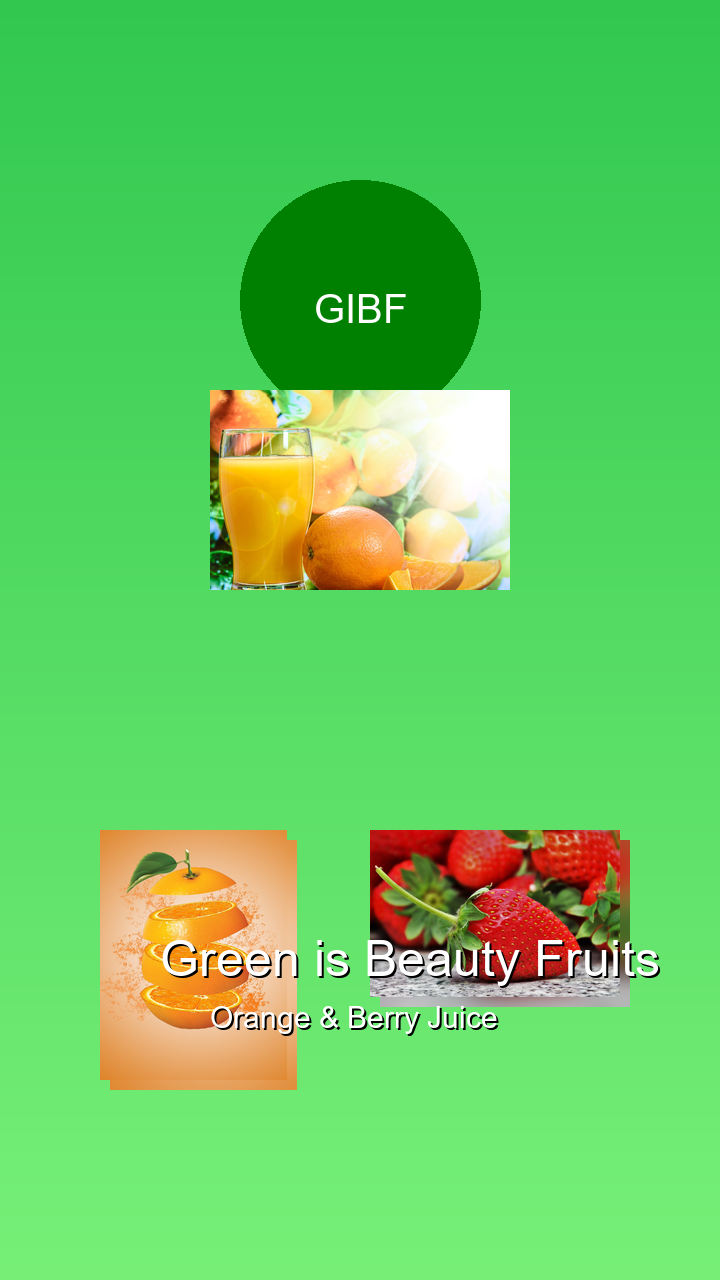

In [74]:
# Settings
WIDTH, HEIGHT = 720, 1280  # Label size
BACKGROUND_COLOR = (50, 200, 80)  # Gradient green start
BACKGROUND_BOTTOM = (120, 240, 120)  # Gradient green bottom
LOGO_COLOR = (0, 128, 0)  # Dark green for the logo circle

# Paths to resources
orange_image_path = "cansProj/orange-7713308_1280.jpg"
strawberry_image_path = "cansProj/strawberries-3359755_1280.jpg"
glass_image_path = "cansProj/orange-1921548_1280.jpg" 
output_file = "juice_can_label_final.png"

# --- Step 1: Create gradient background ---
def create_gradient_background(width, height, top_color, bottom_color):
    gradient = Image.new("RGB", (width, height), top_color)
    top = np.array(top_color)
    bottom = np.array(bottom_color)

    for y in range(height):
        ratio = y / height
        blended_color = tuple((top * (1 - ratio) + bottom * ratio).astype(int))
        ImageDraw.Draw(gradient).line([(0, y), (width, y)], fill=blended_color)

    return gradient

# --- Step 2: Add the circular logo ---
def add_logo(draw, text="GIBF", position=(360, 300), radius=120, color=(0, 128, 0)):
    x, y = position
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], fill=color)
    
    # Add logo text
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    draw.text((x - text_width // 2, y - text_height // 2), text, fill="white", font=font)

# --- Step 3: Add glass with juice splash ---
def add_glass_image(base_image, glass_path, position, max_size):
    glass = Image.open(glass_path).convert("RGBA")
    glass.thumbnail(max_size, Image.LANCZOS)
    
    # Add the image
    base_image.paste(glass, position, glass)

# --- Step 4: Add fruit images ---
def add_fruit_image(base_image, fruit_path, position, max_size):
    fruit = Image.open(fruit_path).convert("RGBA")
    fruit.thumbnail(max_size, Image.LANCZOS)
    
    # Add a soft shadow for a 3D effect
    shadow = fruit.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(fruit, position, fruit)

# --- Step 5: Add product name and tagline ---
def add_text(draw, text, position, font_size, color, shadow_offset=(2, 2)):
    font = ImageFont.truetype("arial.ttf", font_size)
    x, y = position
    
    # Add drop shadow for contrast
    draw.text((x + shadow_offset[0], y + shadow_offset[1]), text, fill="black", font=font)
    draw.text((x, y), text, fill=color, font=font)

# --- Main function to assemble the label ---
def create_juice_can_label():
    # Create background gradient
    background = create_gradient_background(WIDTH, HEIGHT, BACKGROUND_COLOR, BACKGROUND_BOTTOM)
    draw = ImageDraw.Draw(background)

    # Add logo (moved downward)
    add_logo(draw, text="GIBF", position=(WIDTH // 2, 300), radius=120, color=LOGO_COLOR)

    # Add glass with juice splash (moved upward)
    add_glass_image(background, glass_image_path, position=(WIDTH // 2 - 150, HEIGHT // 2 - 250), max_size=(300, 300))

    # Add fruit images (moved upward)
    add_fruit_image(background, orange_image_path, position=(100, HEIGHT - 450), max_size=(250, 250))
    add_fruit_image(background, strawberry_image_path, position=(WIDTH - 350, HEIGHT - 450), max_size=(250, 250))

    # Add product name and tagline (moved upward)
    product_name = "Green is Beauty Fruits"
    tagline = "Orange & Berry Juice"

    add_text(draw, product_name, position=(WIDTH // 2 - 200, HEIGHT - 350), font_size=50, color="white")
    add_text(draw, tagline, position=(WIDTH // 2 - 150, HEIGHT - 280), font_size=30, color="white")

    # Save the output
    background.save(output_file)
    print(f"Label saved to {output_file}")
    return background

# --- Run the main function ---
if __name__ == "__main__":
    final_image = create_juice_can_label()
ipd.Image(output_file)


FURTHER ADJUSTMENTS

Label saved to juice_can_label_final_adjusted.png


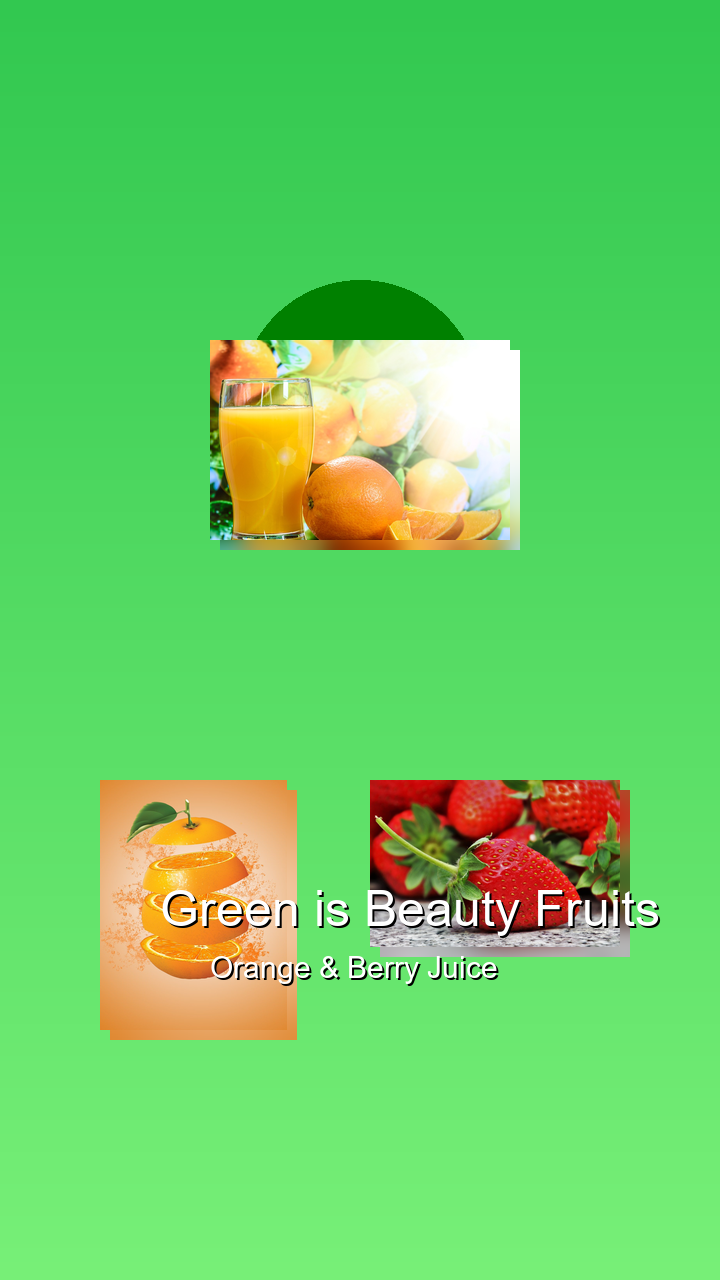

In [83]:
# Settings
WIDTH, HEIGHT = 720, 1280  # Label size
BACKGROUND_COLOR = (50, 200, 80)  # Gradient green start
BACKGROUND_BOTTOM = (120, 240, 120)  # Gradient green bottom
LOGO_COLOR = (0, 128, 0)  # Dark green for the logo circle

# Paths to resources
orange_image_path = "cansProj/orange-7713308_1280.jpg" 
strawberry_image_path = "cansProj/strawberries-3359755_1280.jpg"  
glass_image_path = "cansProj/orange-1921548_1280.jpg"
output_file = "juice_can_label_final_adjusted.png"

# --- Step 1: Create gradient background ---
def create_gradient_background(width, height, top_color, bottom_color):
    gradient = Image.new("RGB", (width, height), top_color)
    top = np.array(top_color)
    bottom = np.array(bottom_color)

    for y in range(height):
        ratio = y / height
        blended_color = tuple((top * (1 - ratio) + bottom * ratio).astype(int))
        ImageDraw.Draw(gradient).line([(0, y), (width, y)], fill=blended_color)

    return gradient

# --- Step 2: Add the circular logo ---
def add_logo(draw, text="GIBF", position=(360, 400), radius=120, color=(0, 128, 0)):
    x, y = position
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], fill=color)
    
    # Add logo text
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    draw.text((x - text_width // 2, y - text_height // 2), text, fill="white", font=font)

# --- Step 3: Add the glass image ---
def add_glass_image(base_image, glass_path, position, max_size):
    glass = Image.open(glass_path).convert("RGBA")
    glass.thumbnail(max_size, Image.Resampling.LANCZOS)
    
    shadow = glass.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(glass, position, glass)

# --- Step 4: Resize and add fruit images ---
def add_fruit_image(base_image, fruit_path, position, max_size):
    fruit = Image.open(fruit_path).convert("RGBA")
    fruit.thumbnail(max_size, Image.Resampling.LANCZOS)
    
    shadow = fruit.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(fruit, position, fruit)

# --- Step 5: Add product name and tagline ---
def add_text(draw, text, position, font_size, color, shadow_offset=(2, 2)):
    font = ImageFont.truetype("arial.ttf", font_size)
    x, y = position
    
    draw.text((x + shadow_offset[0], y + shadow_offset[1]), text, fill="black", font=font)
    draw.text((x, y), text, fill=color, font=font)

# --- Main function to assemble the label ---
def create_juice_can_label():
    # Step 1: Create background gradient
    background = create_gradient_background(WIDTH, HEIGHT, BACKGROUND_COLOR, BACKGROUND_BOTTOM)
    draw = ImageDraw.Draw(background)

    # Step 2: Add the logo
    add_logo(draw, text="GIBF", position=(WIDTH // 2, 400), radius=120, color=LOGO_COLOR)

    # Step 3: Add the glass image
    add_glass_image(background, glass_image_path, position=(WIDTH // 2 - 150, HEIGHT // 2 - 300), max_size=(300, 300))

    # Step 4: Add fruit images
    add_fruit_image(background, orange_image_path, position=(100, HEIGHT - 500), max_size=(250, 250))
    add_fruit_image(background, strawberry_image_path, position=(WIDTH - 350, HEIGHT - 500), max_size=(250, 250))

    # Step 5: Add product name and tagline
    product_name = "Green is Beauty Fruits"
    tagline = "Orange & Berry Juice"

    add_text(draw, product_name, position=(WIDTH // 2 - 200, HEIGHT - 400), font_size=50, color="white")
    add_text(draw, tagline, position=(WIDTH // 2 - 150, HEIGHT - 330), font_size=30, color="white")

    # Save the final output
    background.save(output_file)
    print(f"Label saved to {output_file}")

# Run the main function
if __name__ == "__main__":
    create_juice_can_label()
ipd.Image(output_file)


ADDING SHADOWS AND SWITCHING FONTS

Georgia.ttf not found. Falling back to Arial.
Georgia.ttf not found. Falling back to Arial.
Label saved to juice_can_label_final_adjusted_serif.png


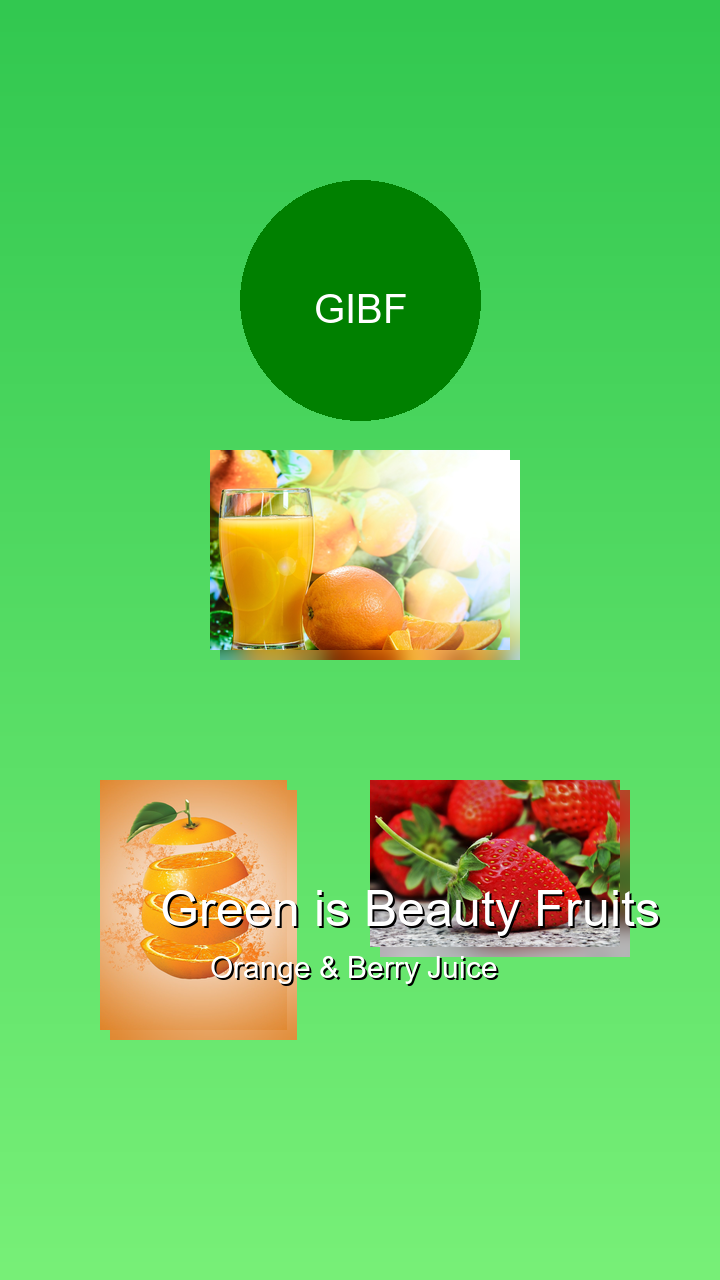

In [88]:
# Settings
WIDTH, HEIGHT = 720, 1280  # Label size
BACKGROUND_COLOR = (50, 200, 80)  # Gradient green start
BACKGROUND_BOTTOM = (120, 240, 120)  # Gradient green bottom
LOGO_COLOR = (0, 128, 0)  # Dark green for the logo circle

# Paths to resources
orange_image_path = "cansProj/orange-7713308_1280.jpg" 
strawberry_image_path = "cansProj/strawberries-3359755_1280.jpg"  
glass_image_path = "cansProj/orange-1921548_1280.jpg"
output_file = "juice_can_label_final_adjusted_serif.png"

# --- Step 1: Create gradient background ---
def create_gradient_background(width, height, top_color, bottom_color):
    gradient = Image.new("RGB", (width, height), top_color)
    top = np.array(top_color)
    bottom = np.array(bottom_color)

    for y in range(height):
        ratio = y / height
        blended_color = tuple((top * (1 - ratio) + bottom * ratio).astype(int))
        ImageDraw.Draw(gradient).line([(0, y), (width, y)], fill=blended_color)

    return gradient

# --- Step 2: Add the circular logo ---
def add_logo(draw, text="GIBF", position=(360, 400), radius=120, color=(0, 128, 0)):
    x, y = position
    draw.ellipse([(x - radius, y - radius), (x + radius, y + radius)], fill=color)
    
    # Add logo text
    font = ImageFont.truetype("arial.ttf", 40)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    draw.text((x - text_width // 2, y - text_height // 2), text, fill="white", font=font)

# --- Step 3: Add the glass image ---
def add_glass_image(base_image, glass_path, position, max_size):
    glass = Image.open(glass_path).convert("RGBA")
    glass.thumbnail(max_size, Image.Resampling.LANCZOS)
    
    shadow = glass.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(glass, position, glass)

# --- Step 4: Resize and add fruit images ---
def add_fruit_image(base_image, fruit_path, position, max_size):
    fruit = Image.open(fruit_path).convert("RGBA")
    fruit.thumbnail(max_size, Image.Resampling.LANCZOS)
    
    shadow = fruit.copy().filter(ImageFilter.GaussianBlur(10))
    shadow_position = (position[0] + 10, position[1] + 10)
    base_image.paste(shadow, shadow_position, shadow)
    base_image.paste(fruit, position, fruit)

# Use a fallback serif font (Arial or system defaults)
def add_text(draw, text, position, font_size, color, font_path=None, shadow_offset=(2, 2)):
    try:
        # Try loading a serif font like Georgia
        font = ImageFont.truetype("Georgia.ttf", font_size)
    except OSError:
        # Fallback to Arial if Georgia is not found
        print("Georgia.ttf not found. Falling back to Arial.")
        font = ImageFont.truetype("arial.ttf", font_size)

    x, y = position
    draw.text((x + shadow_offset[0], y + shadow_offset[1]), text, fill="black", font=font)
    draw.text((x, y), text, fill=color, font=font)


# --- Main function to assemble the label ---
def create_juice_can_label():
    # Step 1: Create background gradient
    background = create_gradient_background(WIDTH, HEIGHT, BACKGROUND_COLOR, BACKGROUND_BOTTOM)
    draw = ImageDraw.Draw(background)

    # Step 2: Add the logo
    add_logo(draw, text="GIBF", position=(WIDTH // 2, 300), radius=120, color=LOGO_COLOR)

    # Step 3: Add the glass image (centered below the logo)
    add_glass_image(background, glass_image_path, position=(WIDTH // 2 - 150, 450), max_size=(300, 300))

    # Step 4: Add fruit images
    add_fruit_image(background, orange_image_path, position=(100, HEIGHT - 500), max_size=(250, 250))
    add_fruit_image(background, strawberry_image_path, position=(WIDTH - 350, HEIGHT - 500), max_size=(250, 250))

    # Step 5: Add product name and tagline
    product_name = "Green is Beauty Fruits"
    tagline = "Orange & Berry Juice"

    # Use bold serif font (e.g., Georgia or Times New Roman)
    add_text(draw, product_name, position=(WIDTH // 2 - 200, HEIGHT - 400), font_size=50, color="white", font_path="Georgia.ttf")
    add_text(draw, tagline, position=(WIDTH // 2 - 150, HEIGHT - 330), font_size=30, color="white", font_path="Georgia.ttf")

    # Save the final output
    background.save(output_file)
    print(f"Label saved to {output_file}")

# Run the main function
if __name__ == "__main__":
    create_juice_can_label()
ipd.Image(output_file)

CREATING A MOCK_UP CAN

Final mockup saved as final_can_mockup.png


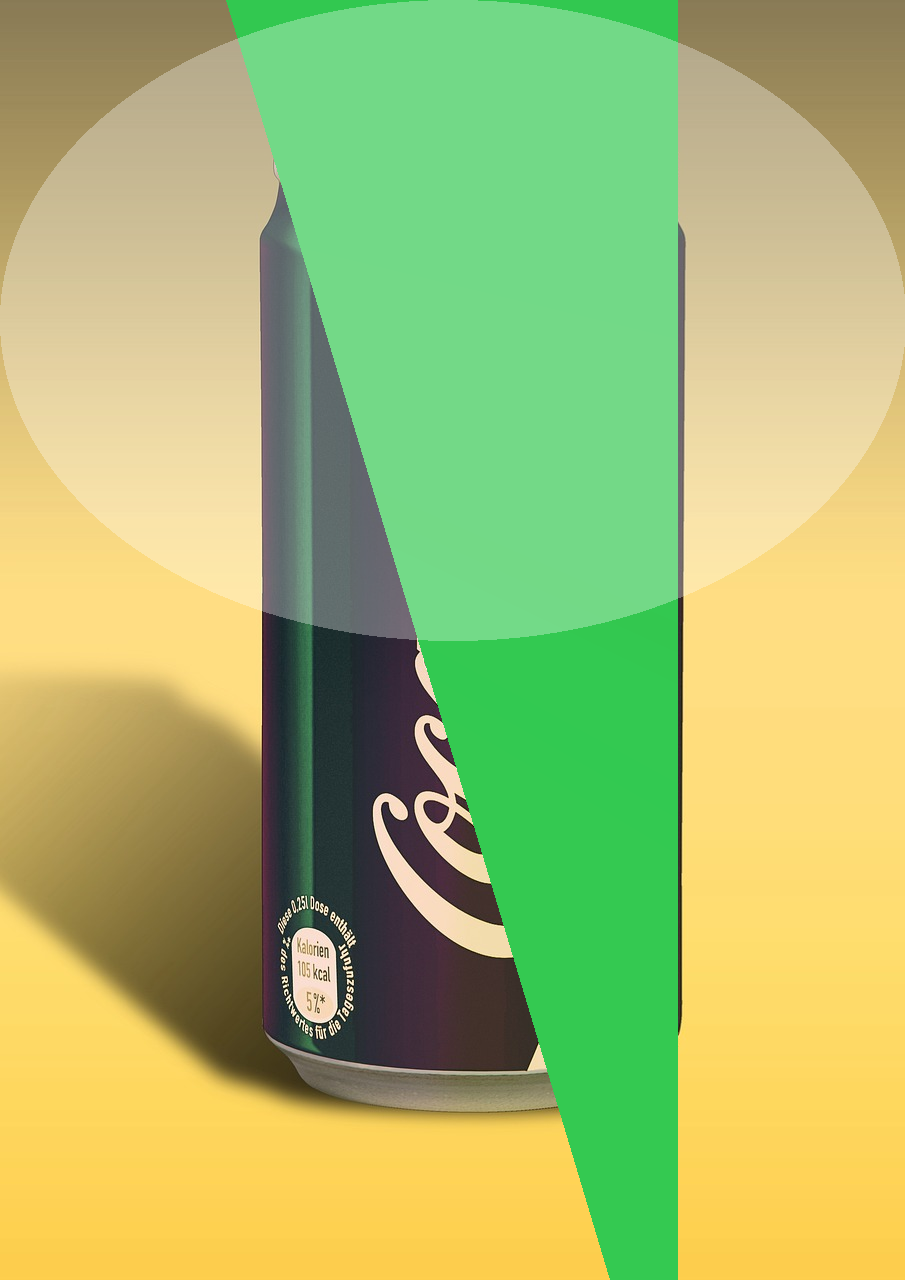

In [97]:
 # Paths
can_image_path = "cansProj/coke-672295_1280.jpg"  
label_image_path = "juice_can_label_final_adjusted_serif.png"  
output_path = "final_can_mockup.png"

# Load can image
can_image = Image.open(can_image_path).convert("RGBA")

# Load and prepare label
label_image = Image.open(label_image_path).convert("RGBA")
label_resized = label_image.resize((can_image.width // 2, can_image.height), Image.Resampling.LANCZOS)

# Warp the label slightly to match the cylindrical can (simulate curvature)
def warp_label(label):
    return label.transform(
        (label.width, label.height),
        Image.PERSPECTIVE,
        data=[1, -0.3, 0, 0, 0.1, 1, 0.001, 0.001],  # Perspective warp data
        resample=Image.BICUBIC,
    )

warped_label = warp_label(label_resized)

# Overlay the label on the can
# Center the label
x_offset = (can_image.width - warped_label.width) // 2
y_offset = (can_image.height - warped_label.height) // 2

# Create a mask for blending
mask = Image.new("L", warped_label.size, 200)  # Semi-transparent mask
can_with_label = can_image.copy()
can_with_label.paste(warped_label, (x_offset, y_offset), warped_label)

# Add lighting effects for realism
def add_highlights(image):
    highlight = Image.new("RGBA", image.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(highlight)
    draw.ellipse([(0, 0), (image.width, image.height // 2)], fill=(255, 255, 255, 80))
    return Image.alpha_composite(image, highlight)

final_output = add_highlights(can_with_label)

# Save the result
final_output.save(output_path)
print(f"Final mockup saved as {output_path}")
ipd.Image(output_path)


IMPROVED MOKEUP

Final mockup saved at realistic_can_mockup.png


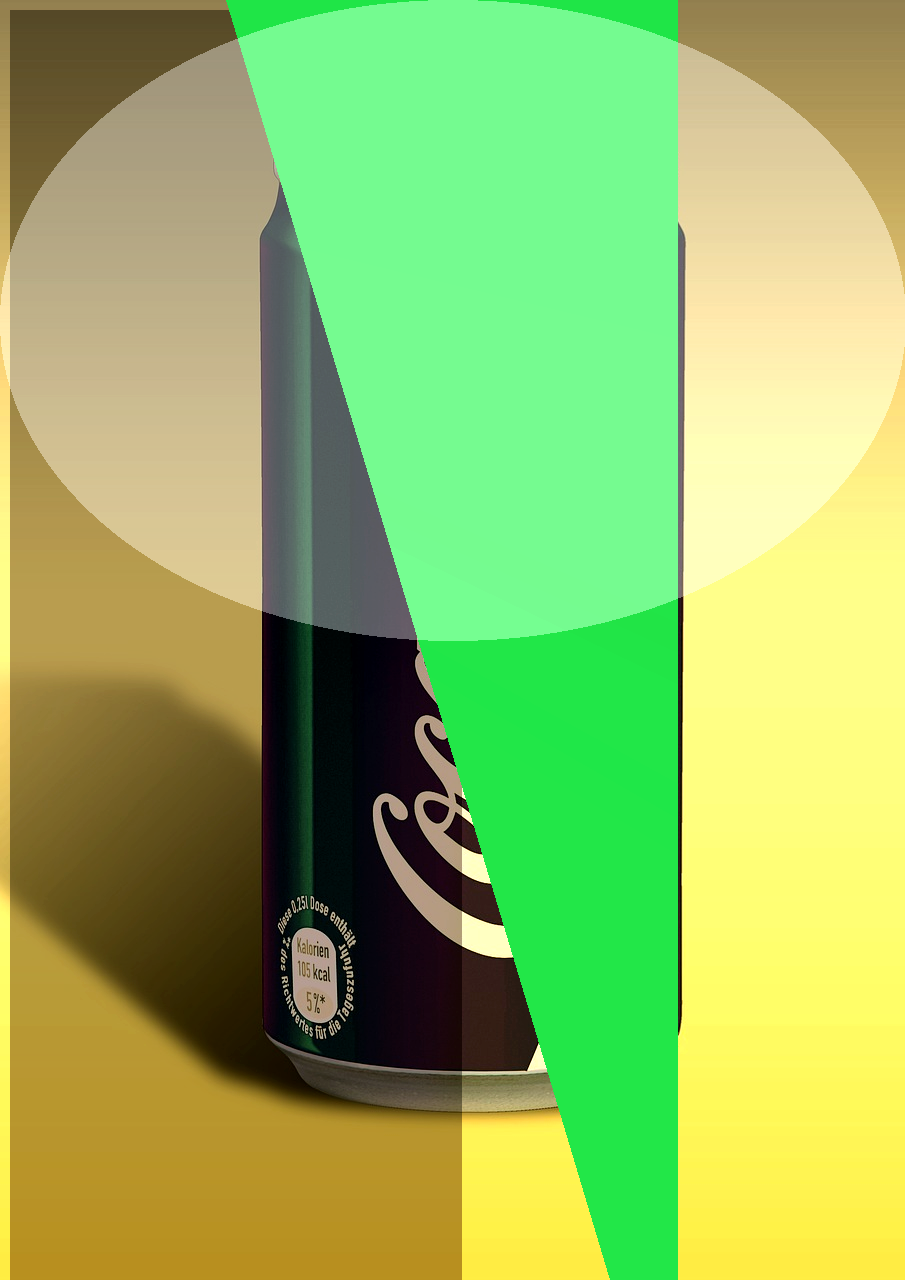

In [106]:
# Paths
can_image_path = "cansProj/coke-672295_1280.jpg"  
label_image_path = "juice_can_label_final_adjusted_serif.png"   
output_path = "realistic_can_mockup.png"

# Load the base can image
can_image = Image.open(can_image_path).convert("RGBA")

# Load and resize label
label_image = Image.open(label_image_path).convert("RGBA")
label_resized = label_image.resize((can_image.width // 2, can_image.height), Image.Resampling.LANCZOS)

# Function: Apply perspective warp to simulate curvature
def warp_label(label):
    return label.transform(
        (label.width, label.height),
        Image.PERSPECTIVE,
        data=[1, -0.3, 0, 0, 0.1, 1, 0.001, 0.001],  # Adjust for cylindrical effect
        resample=Image.BICUBIC,
    )

warped_label = warp_label(label_resized)

# Add shadow for depth
def add_shadow(image, base_size, offset=(10, 10), blur_radius=15):
    # Create shadow layer with the size of the base image (can_image)
    shadow = Image.new("RGBA", base_size, (0, 0, 0, 0))  # Transparent base
    shadow_layer = Image.new("RGBA", image.size, (0, 0, 0, 150))  # Shadow
    shadow_layer = shadow_layer.filter(ImageFilter.GaussianBlur(blur_radius))
    
    # Place the shadow at the correct offset
    shadow.paste(shadow_layer, offset, shadow_layer)
    return shadow

# Updated usage
shadow_layer = add_shadow(warped_label, can_image.size)  # Ensure same size as can_image
can_with_shadow = Image.alpha_composite(can_image, shadow_layer)

# Place the warped label at the center
x_offset = (can_image.width - warped_label.width) // 2
y_offset = (can_image.height - warped_label.height) // 2
can_with_shadow.paste(warped_label, (x_offset, y_offset), warped_label)


# Add highlights for realism
def add_highlights(image):
    highlight = Image.new("RGBA", image.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(highlight)
    draw.ellipse([(0, 0), (image.width, image.height // 2)], fill=(255, 255, 255, 80))
    return Image.alpha_composite(image, highlight)

final_can = add_highlights(can_with_shadow)

# Adjust contrast and brightness for metallic effect
def enhance_image(image, contrast=1.2, brightness=1.1):
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness)
    return image

final_output = enhance_image(final_can)

# Save the final image
final_output.save(output_path)
print(f"Final mockup saved at {output_path}")
ipd.Image(output_path)


MOKEUP ADJUSTED

Realistic can mockup saved to: final_can_with_label_adjusted.png


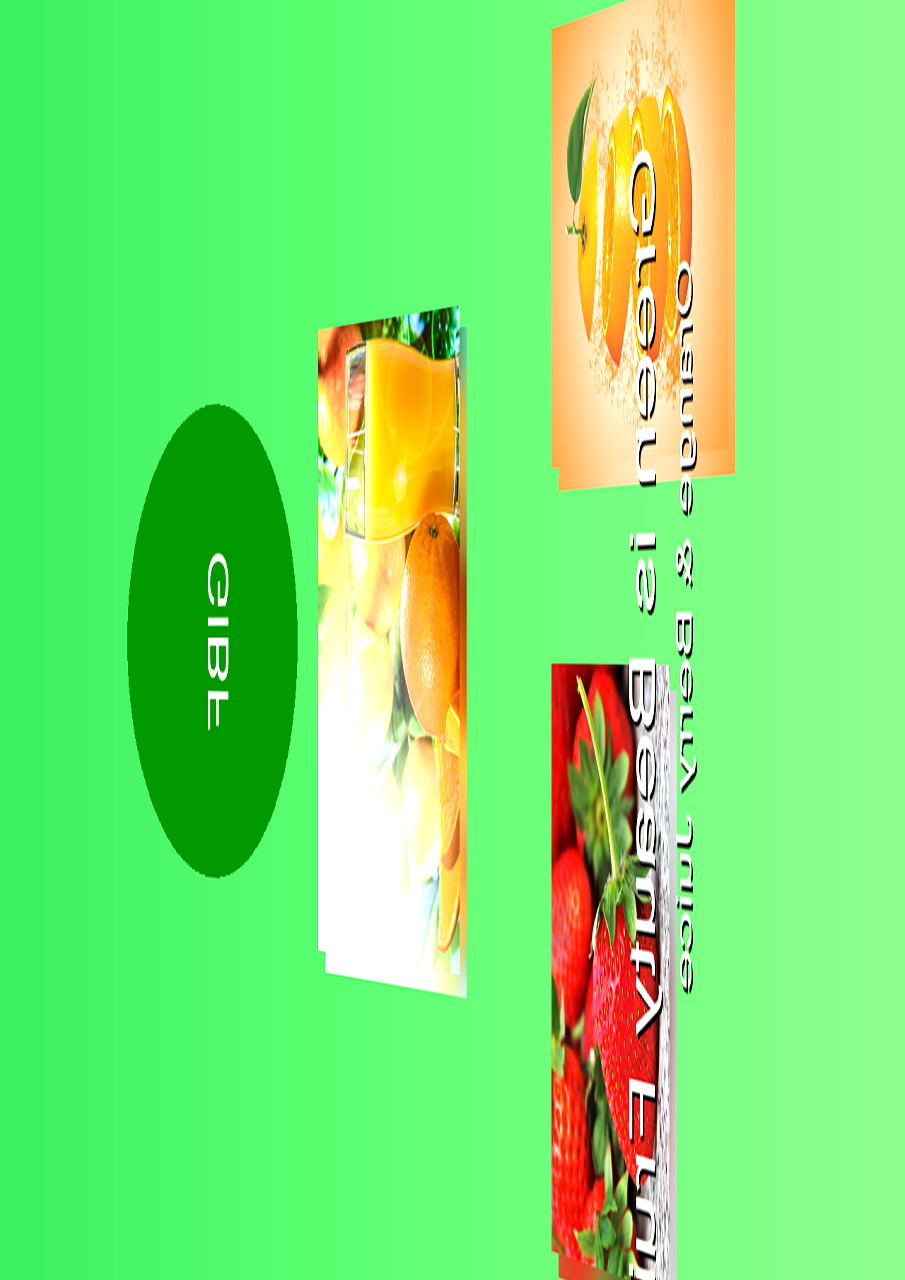

In [139]:
def warp_label_to_cylinder(label, base_size):
    """
    Simulate cylindrical warping of the label.
    """
    warped_label = label.resize(base_size)
    warped_label = warped_label.transform(
        base_size,
        Image.QUAD,
        data=(0, 0, base_size[0], 0, base_size[0] * 0.8, base_size[1], base_size[0] * 0.2, base_size[1]),
        resample=Image.BICUBIC
    )
    return warped_label

def add_shadow(base_image, label, offset=(5, 5), blur_radius=10):
    """
    Add a shadow effect for depth.
    """
    shadow = Image.new("RGBA", base_image.size, (0, 0, 0, 0))
    shadow_layer = label.copy().convert("L").point(lambda p: p > 0 and 128)
    shadow_layer = shadow_layer.filter(ImageFilter.GaussianBlur(blur_radius))
    shadow.paste((0, 0, 0, 100), [offset[0], offset[1], label.width + offset[0], label.height + offset[1]], mask=shadow_layer)
    return shadow

def overlay_label_on_can(base_can_path, label_path, output_path):
    """
    Overlay the label onto a realistic can mockup.
    """
    # Load images
    base_can = Image.open(base_can_path).convert("RGBA")
    label = Image.open(label_path).convert("RGBA")

    # Warp the label to fit the can curvature
    warped_label = warp_label_to_cylinder(label, base_can.size)

    # Create shadow for depth
    shadow_layer = add_shadow(base_can, warped_label)

    # Composite shadow and label onto the can
    can_with_shadow = Image.alpha_composite(base_can, shadow_layer)
    final_can = Image.alpha_composite(can_with_shadow, warped_label)

    # Enhance lighting and reflections (optional)
    enhancer = ImageEnhance.Brightness(final_can)
    final_can = enhancer.enhance(1.2)  # Adjust brightness slightly for highlights

    # Save the result
    final_can.save(output_path, "PNG")
    print(f"Realistic can mockup saved to: {output_path}")

# Paths to files
base_can_path = "cansProj/coke-672295_1280.jpg" 
label_path = "juice_can_label_final_adjusted_serif.png"
output_path = "final_can_with_label_adjusted.png"

# Run the overlay function
overlay_label_on_can(base_can_path, label_path, output_path)
ipd.Image(output_path)


TRANSFORMATIONS AND ROTATION ADJUSTED

Corrected can mockup saved to: final_corrected_mockup.png


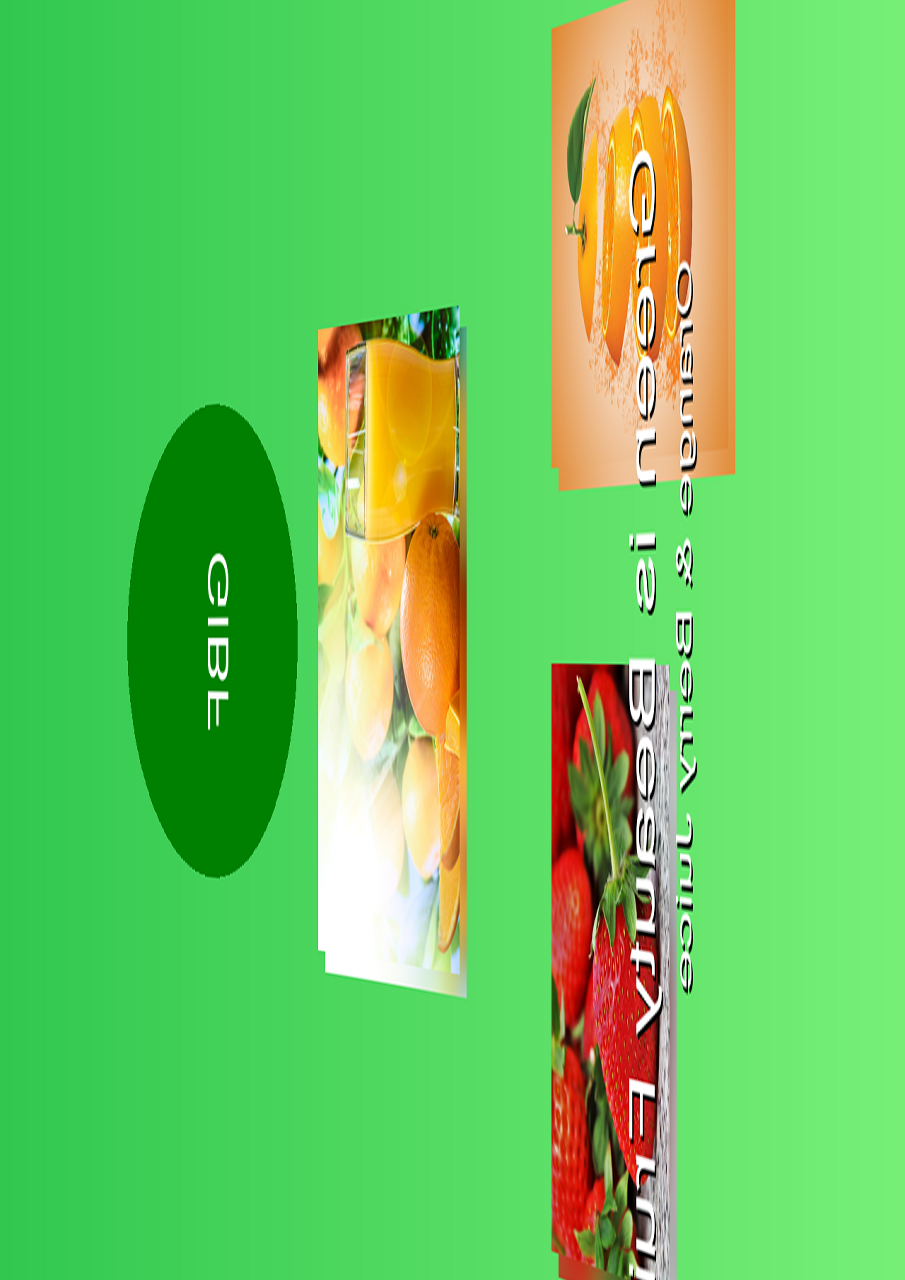

In [141]:
def warp_label_to_can(label, base_size):
    """
    Warp the label to simulate wrapping around the cylindrical surface of a can.
    """
    warped_label = label.resize(base_size)
    warped_label = warped_label.transform(
        base_size,
        Image.QUAD,
        data=(0, 0, base_size[0], 0, base_size[0] * 0.8, base_size[1], base_size[0] * 0.2, base_size[1]),
        resample=Image.BICUBIC
    )
    return warped_label

def fix_green_background(image):
    """
    Replace the green background with transparency.
    """
    image = image.convert("RGBA")
    data = image.getdata()
    new_data = []
    for item in data:
        if item[1] > 150 and item[0] < 100 and item[2] < 100:  # Detect green pixels
            new_data.append((0, 0, 0, 0))  # Replace with transparency
        else:
            new_data.append(item)
    image.putdata(new_data)
    return image

def overlay_label_on_can(base_can_path, label_path, output_path):
    """
    Align, warp, and blend the label onto the can image.
    """
    # Load images
    base_can = Image.open(base_can_path).convert("RGBA")
    label = Image.open(label_path).convert("RGBA")

    # Fix the green background (if present)
    base_can = fix_green_background(base_can)

    # Warp the label to fit the cylindrical can
    warped_label = warp_label_to_can(label, base_can.size)

    # Adjust rotation if necessary
    warped_label = warped_label.rotate(0, expand=True)  # Modify rotation angle as needed

    # Composite the warped label onto the can
    final_can = Image.alpha_composite(base_can, warped_label)

    # Save the result
    final_can.save(output_path, "PNG")
    print(f"Corrected can mockup saved to: {output_path}")

# Paths to files
base_can_path = "final_can_with_label_adjusted.png"  
label_path = "juice_can_label_final_adjusted_serif.png"
output_path = "final_corrected_mockup.png"

# Run the overlay function
overlay_label_on_can(base_can_path, label_path, output_path)
ipd.Image(output_path)

FURTHER CAN ADJUSTING

Corrected mockup saved to final_pro_mockup_fixed.png


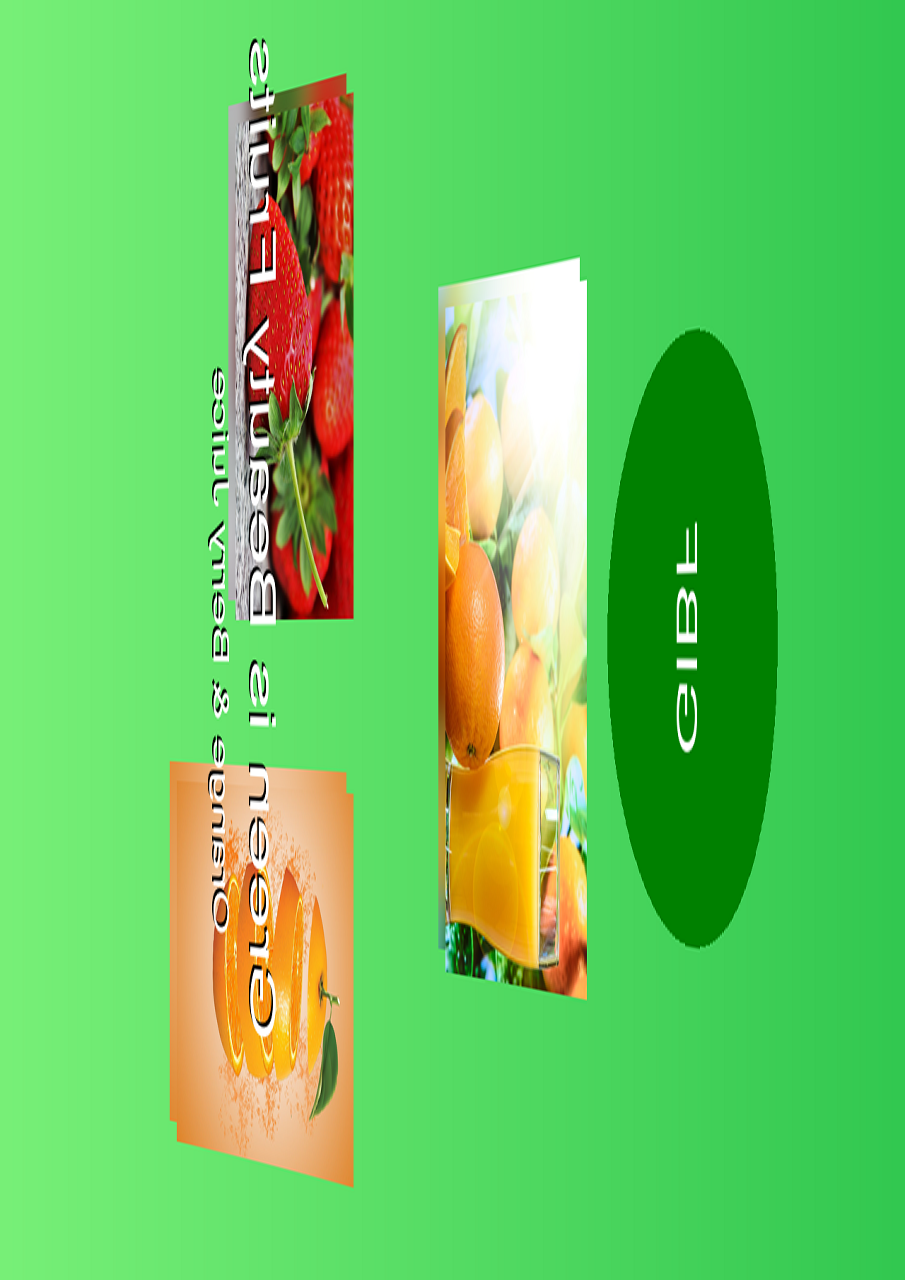

In [143]:
def warp_label(label, base_size):
    """
    Warp the label to simulate cylindrical curvature.
    """
    label = label.resize(base_size)  # Match size to can
    warped_label = label.transform(
        base_size, 
        Image.QUAD, 
        (0, 0, base_size[0], 0, base_size[0] * 0.8, base_size[1], base_size[0] * 0.2, base_size[1]),
        resample=Image.BICUBIC
    )
    return warped_label

def fix_orientation(label):
    """
    Rotate the label to correct its orientation.
    """
    return label.rotate(180, expand=True)  # Flip upside down if needed

def replace_green_background(image):
    """
    Replace the green background with transparency.
    """
    image = image.convert("RGBA")
    data = image.getdata()
    new_data = [
        (0, 0, 0, 0) if item[1] > 150 and item[0] < 100 and item[2] < 100 else item 
        for item in data
    ]
    image.putdata(new_data)
    return image

def overlay_label_on_can(base_can_path, label_path, output_path):
    """
    Overlay, warp, and align the label on the can.
    """
    # Load the images
    base_can = Image.open(base_can_path).convert("RGBA")
    label = Image.open(label_path).convert("RGBA")

    # Fix the orientation and wrap the label
    label = fix_orientation(label)
    warped_label = warp_label(label, base_can.size)

    # Remove green background
    base_can = replace_green_background(base_can)

    # Composite the images
    final_image = Image.alpha_composite(base_can, warped_label)

    # Save the output
    final_image.save(output_path, "PNG")
    print(f"Corrected mockup saved to {output_path}")

# Input and output file paths
base_can_path = "cansProj/coke-672295_1280.jpg"
label_path = "juice_can_label_final_adjusted_serif.png" 
output_path = "final_pro_mockup_fixed.png"

# Run the function
overlay_label_on_can(base_can_path, label_path, output_path)
ipd.Image(output_path)


NEW ADJUSTIMENTS

Resizing label...
Warping label...
Overlaying label on can...
Mockup saved as 'final_mockup_with_label.png'


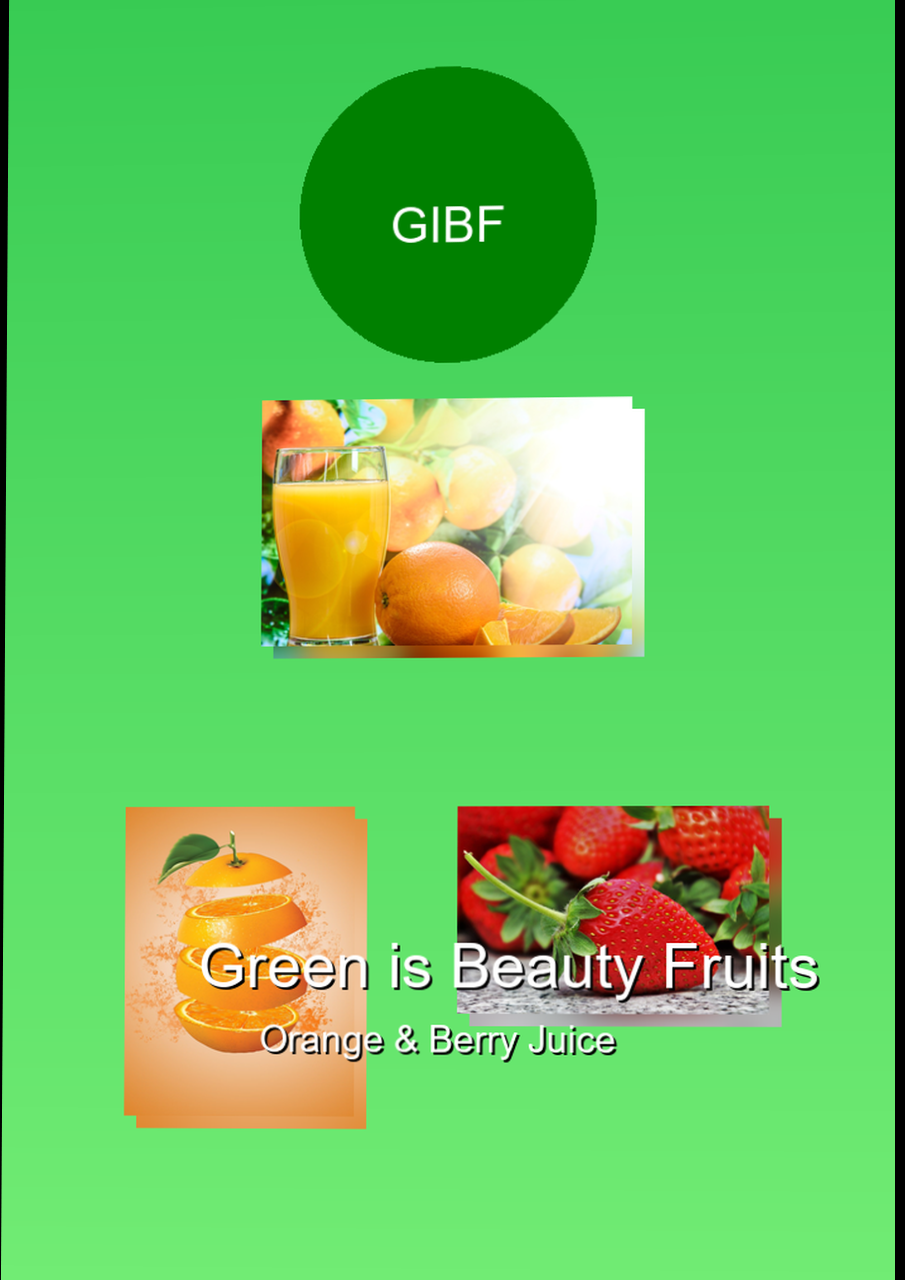

In [145]:
def resize_label(label_path, can_width):
    """
    Resize the label image to match the can width while maintaining its aspect ratio.
    """
    label_image = Image.open(label_path)
    aspect_ratio = label_image.height / label_image.width
    new_height = int(can_width * aspect_ratio)
    resized_label = label_image.resize((can_width, new_height), Image.LANCZOS)
    return resized_label

def warp_label(label_path, output_size):
    """
    Apply perspective transformation to the label to simulate can curvature.
    """
    # Load label using OpenCV
    label = cv2.imread(label_path)
    label_height, label_width = label.shape[:2]

    # Define source points (corners of the label)
    src_pts = np.float32([[0, 0], [label_width, 0], [0, label_height], [label_width, label_height]])

    # Define destination points to simulate curvature (adjust these for your needs)
    dst_pts = np.float32([
        [10, 20],                           # Top-left corner (moved slightly down/right)
        [label_width - 10, 0],              # Top-right corner
        [0, label_height - 20],             # Bottom-left corner (moved up)
        [label_width - 10, label_height - 10]  # Bottom-right corner
    ])

    # Compute perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

    # Warp the label
    warped_label = cv2.warpPerspective(label, matrix, output_size)
    warped_label_path = "warped_label.png"
    cv2.imwrite(warped_label_path, warped_label)
    return warped_label_path

def overlay_label_on_can(can_path, label_path):
    """
    Overlay the warped label onto the can image.
    """
    # Open the can and label images
    can_image = Image.open(can_path).convert("RGBA")
    label_image = Image.open(label_path).convert("RGBA")

    # Compute position to center the label on the can
    x_offset = (can_image.width - label_image.width) // 2
    y_offset = (can_image.height - label_image.height) // 2

    # Paste the label onto the can image
    final_image = can_image.copy()
    final_image.paste(label_image, (x_offset, y_offset), label_image)
    final_image.save("final_mockup_with_label.png")
    print("Mockup saved as 'final_mockup_with_label.png'")
    return final_image

def main():
    # Paths to input files   
    can_path = "cansProj/coke-672295_1280.jpg"  
    label_path = "juice_can_label_final_adjusted_serif.png"           

    # Step 1: Open can image to get its size
    can_image = Image.open(can_path)
    can_width, can_height = can_image.size

    # Step 2: Resize the label to match the can width
    print("Resizing label...")
    resized_label = resize_label(label_path, can_width)
    resized_label.save("resized_label.png")

    # Step 3: Warp the label to simulate curvature
    print("Warping label...")
    warped_label_path = warp_label("resized_label.png", (can_width, resized_label.height))

    # Step 4: Overlay the warped label onto the can
    print("Overlaying label on can...")
    final_mockup = overlay_label_on_can(can_path, warped_label_path)

    # Show the result
    final_mockup.show()

if __name__ == "__main__":
    main()
ipd.Image("final_mockup_with_label.png")

NEW TRY

Final mockup saved to final_mockup_result.png


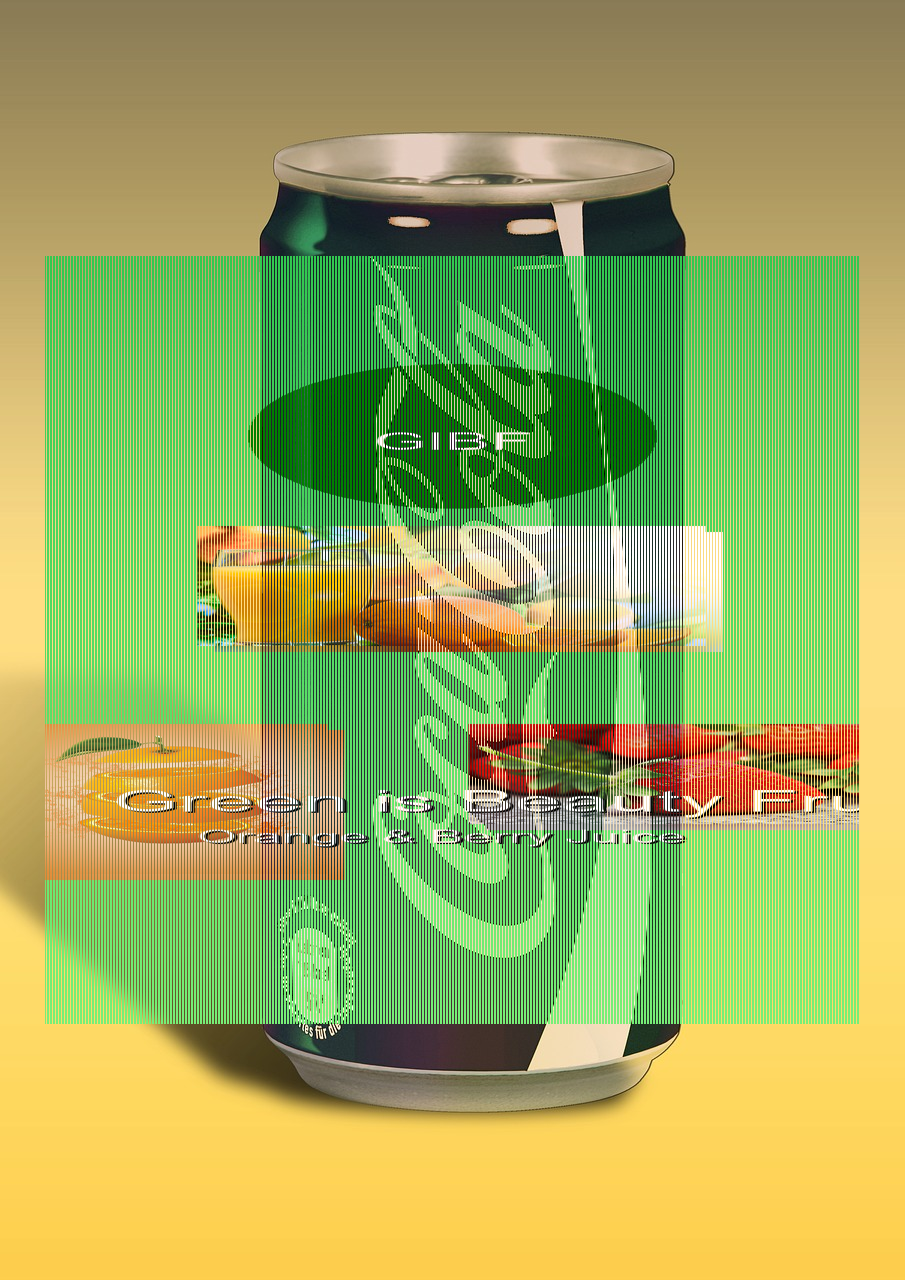

In [148]:
def warp_cylindrical(image, scale_factor=1.5):
    """
    Simulate cylindrical warp for a label.
    """
    width, height = image.size
    warped = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    pixel_map = image.load()
    warped_pixels = warped.load()

    for x in range(width):
        new_x = int(width / 2 + (x - width / 2) * scale_factor)
        if new_x < width:
            for y in range(height):
                warped_pixels[new_x, y] = pixel_map[x, y]
    return warped

# Paths
can_image_path =  "cansProj/coke-672295_1280.jpg" 
label_image_path = "juice_can_label_final_adjusted_serif.png"            
output_path = "final_mockup_result.png"     

# Load images
can_image = Image.open(can_image_path).convert("RGBA")
label_image = Image.open(label_image_path).convert("RGBA")

# Resize label to match can proportions
new_label_width = int(can_image.width * 0.9)  # Adjust to 90% of the can width
new_label_height = int(can_image.height * 0.6)  # Adjust to 60% of can height
label_resized = label_image.resize((new_label_width, new_label_height))

# Apply cylindrical warp
warped_label = warp_cylindrical(label_resized)

# Place the label at the center of the can
x_offset = (can_image.width - warped_label.width) // 2
y_offset = (can_image.height - warped_label.height) // 2
can_with_label = can_image.copy()
can_with_label.paste(warped_label, (x_offset, y_offset), warped_label)

# Save final image
can_with_label.save(output_path)
print(f"Final mockup saved to {output_path}")
ipd.Image(output_path)

CAN FROM SCRATCH

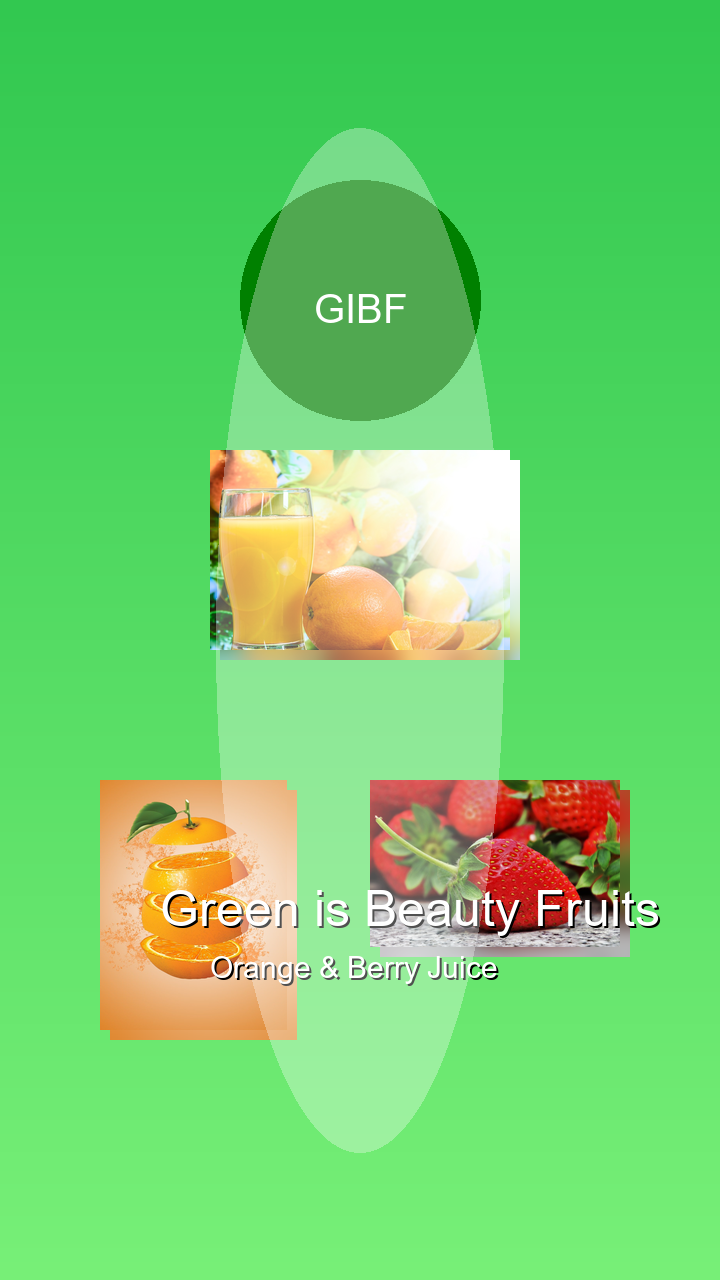

In [156]:
def create_cylinder_mockup(label_path, output_path, can_width=720, can_height=1280):
    """
    Creates a new cylindrical can mockup using the given label image.
    Fits the label perfectly without any distortions.

    Args:
        label_path (str): Path to the label image.
        output_path (str): Path to save the final can mockup.
        can_width (int): Width of the new can mockup.
        can_height (int): Height of the new can mockup.
    """
    # Load label image
    label_image = Image.open(label_path).convert("RGBA")
    label_image = label_image.resize((can_width, can_height))  # Resize to fit can dimensions

    # Create a blank base can with a background color
    can_base = Image.new("RGBA", (can_width, can_height), (200, 200, 200, 255))  # Light gray background

    # Add shading to simulate curvature
    shadow = Image.new("L", (can_width, can_height))
    draw = ImageDraw.Draw(shadow)
    for x in range(can_width):
        # Create gradient shading for a cylindrical effect
        brightness = int(255 * (1 - abs((x - can_width / 2) / (can_width / 2)) * 0.8))
        draw.line([(x, 0), (x, can_height)], fill=brightness)

    shadow = shadow.filter(ImageFilter.GaussianBlur(30))  # Smooth shading
    can_base.putalpha(shadow)  # Add gradient shadow to the base

    # Composite label onto the can base
    can_base.paste(label_image, (0, 0), mask=label_image)

    # Add a simple highlight effect for realism
    highlight = Image.new("RGBA", (can_width, can_height), (255, 255, 255, 0))
    highlight_draw = ImageDraw.Draw(highlight)
    highlight_draw.ellipse(
        [can_width * 0.3, can_height * 0.1, can_width * 0.7, can_height * 0.9],
        fill=(255, 255, 255, 80)
    )
    can_base = Image.alpha_composite(can_base, highlight)

    # Save and display the result
    can_base.save(output_path)
    can_base.show()


# Path to label image and output file
label_path = "juice_can_label_final_adjusted_serif.png"  
output_path = "new_can_mockup.png"  

# Create a new cylindrical can mockup
create_cylinder_mockup(label_path, output_path)
ipd.Image(output_path)


SCRATCH CAN ADJUSTED

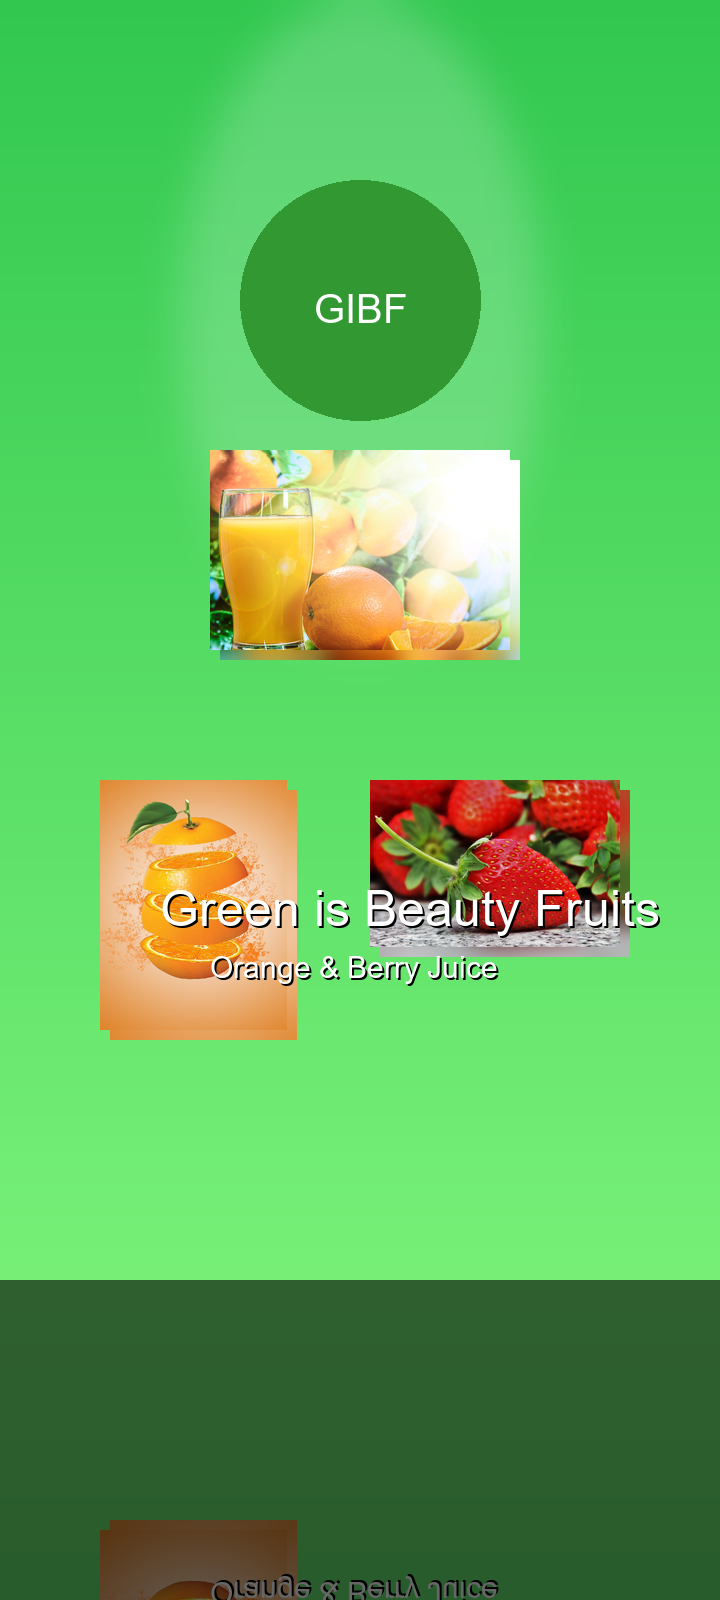

In [167]:
# Paths to the images
can_image_path = "new_can_mockup.png"
label_image_path = "juice_can_label_final_adjusted_serif.png"  
output_path = "professional_can_mockup_scratch.png"

# Load base can and label images
can_image = Image.open(can_image_path).convert("RGBA")
label_image = Image.open(label_image_path).convert("RGBA")
label_image = label_image.resize(can_image.size, Image.Resampling.LANCZOS)  # Smooth resize

# Combine label onto the can
combined = Image.alpha_composite(can_image, label_image)

# Create highlights (soft white gradient on the can's center)
highlight = Image.new("RGBA", can_image.size, (255, 255, 255, 0))
draw = ImageDraw.Draw(highlight)
draw.ellipse(
    [can_image.size[0] // 4, 0, 3 * can_image.size[0] // 4, can_image.size[1] // 2],
    fill=(255, 255, 255, 50),
)
highlight = highlight.filter(ImageFilter.GaussianBlur(20))  # Smooth the highlight
combined = Image.alpha_composite(combined, highlight)

# Add reflection effect
reflection = combined.copy().transpose(Image.FLIP_TOP_BOTTOM)
reflection = ImageEnhance.Brightness(reflection).enhance(0.4)  # Dim reflection
reflection_height = can_image.size[1] // 4
reflection = reflection.crop((0, 0, can_image.size[0], reflection_height))

# Combine the reflection below the can
final_image = Image.new("RGBA", (can_image.size[0], can_image.size[1] + reflection_height), (255, 255, 255, 0))
final_image.paste(combined, (0, 0), combined)
final_image.paste(reflection, (0, can_image.size[1]), reflection)

# Add soft drop shadow
shadow = Image.new("RGBA", final_image.size, (0, 0, 0, 0))
draw_shadow = ImageDraw.Draw(shadow)
shadow_opacity = 80
draw_shadow.ellipse(
    [10, final_image.size[1] - 40, final_image.size[0] - 10, final_image.size[1] - 10],
    fill=(0, 0, 0, shadow_opacity),
)
shadow = shadow.filter(ImageFilter.GaussianBlur(15))
final_with_shadow = Image.alpha_composite(shadow, final_image)

# Add gradient background
background = Image.new("RGBA", final_with_shadow.size, (0, 0, 0, 0))
draw_bg = ImageDraw.Draw(background)
for i in range(final_with_shadow.size[1]):
    color = (34, 193, 195, 255 - (i * 255 // final_with_shadow.size[1]))
    draw_bg.line([(0, i), (final_with_shadow.size[0], i)], fill=color)

# Merge background and final image
output_image = Image.alpha_composite(background, final_with_shadow)

# Save the final professional mockup
output_image.convert("RGB").save(output_path, "PNG")
ipd.Image(output_path)


MORE REFINEMENTS

Mockup saved to refined_professional_can_mockup.png


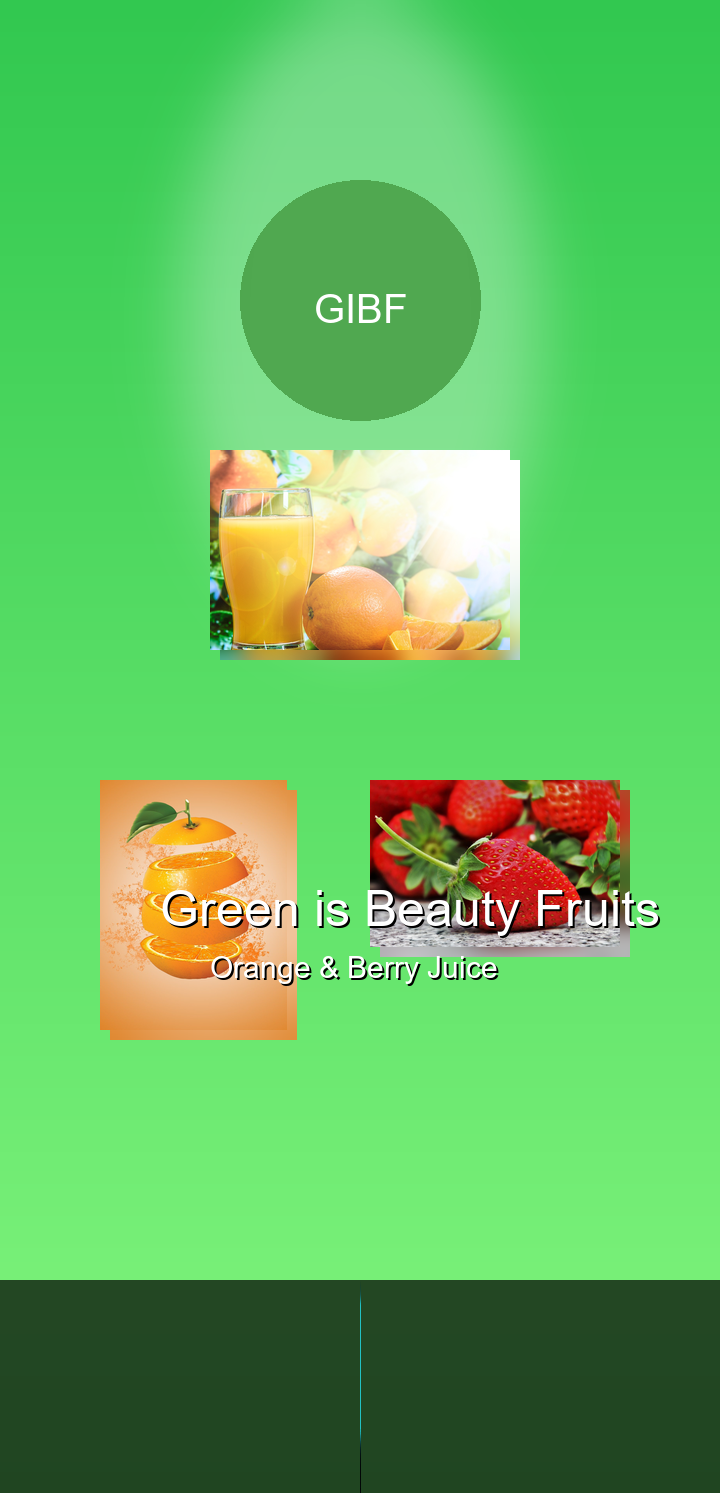

In [170]:
# Paths to images
can_image_path = "new_can_mockup.png"
label_image_path = "juice_can_label_final_adjusted_serif.png"
output_path = "refined_professional_can_mockup.png"

# Load base can and label images
can_image = Image.open(can_image_path).convert("RGBA")
label_image = Image.open(label_image_path).convert("RGBA")
label_image = label_image.resize(can_image.size, Image.Resampling.LANCZOS)

# Combine label onto the can
combined = Image.alpha_composite(can_image, label_image)

# Add highlight (soft white gradient on the can's center)
highlight = Image.new("RGBA", can_image.size, (255, 255, 255, 0))
draw = ImageDraw.Draw(highlight)
draw.ellipse(
    [can_image.size[0] // 4, 0, 3 * can_image.size[0] // 4, can_image.size[1] // 2],
    fill=(255, 255, 255, 80),
)
highlight = highlight.filter(ImageFilter.GaussianBlur(30))
combined = Image.alpha_composite(combined, highlight)

# Add reflection effect (bottom part)
reflection = combined.copy().transpose(Image.FLIP_TOP_BOTTOM)
reflection = ImageEnhance.Brightness(reflection).enhance(0.3)  # Dim reflection
reflection_height = can_image.size[1] // 6
reflection = reflection.crop((0, 0, can_image.size[0], reflection_height))

# Add a smooth gradient fade for the reflection
fade_mask = Image.new("L", (can_image.size[0], reflection_height), 255)
for i in range(reflection_height):
    fade_mask.putpixel((can_image.size[0] // 2, i), max(255 - i * 10, 0))
reflection.putalpha(fade_mask)

# Combine everything into one image
final_image = Image.new("RGBA", (can_image.size[0], can_image.size[1] + reflection_height), (0, 0, 0, 0))
final_image.paste(combined, (0, 0), combined)
final_image.paste(reflection, (0, can_image.size[1]), reflection)

# Add soft drop shadow
shadow = Image.new("RGBA", final_image.size, (0, 0, 0, 0))
draw_shadow = ImageDraw.Draw(shadow)
draw_shadow.ellipse(
    [15, final_image.size[1] - 40, final_image.size[0] - 15, final_image.size[1] - 10],
    fill=(0, 0, 0, 100),
)
shadow = shadow.filter(ImageFilter.GaussianBlur(10))
final_with_shadow = Image.alpha_composite(shadow, final_image)

# Add gradient background
background = Image.new("RGBA", final_with_shadow.size, (0, 0, 0, 0))
gradient = ImageDraw.Draw(background)
for i in range(final_with_shadow.size[1]):
    color = (34, 193, 195, 255 - int(i * 255 / final_with_shadow.size[1]))
    gradient.line([(0, i), (final_with_shadow.size[0], i)], fill=color)

# Merge background and final image
output_image = Image.alpha_composite(background, final_with_shadow)

# Save the final mockup
output_image.convert("RGB").save(output_path, "PNG")
print(f"Mockup saved to {output_path}")
ipd.Image(output_path)
